In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.templat

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
from nltk.corpus import stopwords

In [6]:
import gensim

In [7]:
from gensim.corpora.dictionary import Dictionary

In [19]:
articles = pd.read_csv('../Datasets/News articles/articles.txt', names=['text'])
articles.head()

,text
0,Image copyright EPA Image caption Uber has bee...
1,Ride-sharing firm Uber is facing a criminal in...
2,The scrutiny has started because the firm is a...
3,The software
4,A spokesman for Uber declined to comment on th...


In [20]:
articles['text']

0      Image copyright EPA Image caption Uber has bee...
1      Ride-sharing firm Uber is facing a criminal in...
2      The scrutiny has started because the firm is a...
3                                           The software
4      A spokesman for Uber declined to comment on th...
                             ...                        
99                  The latest study shows that chatbots
100    As the stilted computer interactions of today ...
101    One concern is the potential for technology de...
102    There is also the potential for users to becom...
103                                             “However
Name: text, Length: 104, dtype: object

In [21]:
tokens = [word_tokenize(text.lower()) for text in articles['text']]

In [22]:
tokens2 = [token for token in tokens if token not in stopwords.words('english')]

In [23]:
from nltk.stem import WordNetLemmatizer

In [24]:
from gensim.corpora.dictionary import Dictionary

In [25]:
dic = Dictionary(tokens2)

In [26]:
dic.token2id

{'been': 0,
 'business': 1,
 'caption': 2,
 'copyright': 3,
 'criticised': 4,
 'epa': 5,
 'has': 6,
 'image': 7,
 'it': 8,
 'its': 9,
 'many': 10,
 'over': 11,
 'runs': 12,
 'the': 13,
 'times': 14,
 'uber': 15,
 'way': 16,
 '.': 17,
 'a': 18,
 'by': 19,
 'criminal': 20,
 'facing': 21,
 'firm': 22,
 'government': 23,
 'investigation': 24,
 'is': 25,
 'ride-sharing': 26,
 'us': 27,
 "''": 28,
 '``': 29,
 'accused': 30,
 'banned': 31,
 'because': 32,
 'in': 33,
 'let': 34,
 'of': 35,
 'operate': 36,
 'or': 37,
 'regions': 38,
 'restricted': 39,
 'scrutiny': 40,
 'secret': 41,
 'software': 42,
 'started': 43,
 'that': 44,
 'using': 45,
 'was': 46,
 'where': 47,
 'comment': 48,
 'declined': 49,
 'for': 50,
 'on': 51,
 'spokesman': 52,
 'to': 53,
 'areas': 54,
 'claimed': 55,
 'greyball': 56,
 'several': 57,
 'used': 58,
 'blocked': 59,
 'bookings': 60,
 'those': 61,
 'last': 62,
 'letter': 63,
 'portland': 64,
 'regulators': 65,
 'sent': 66,
 'transport': 67,
 'week': 68,
 "'s": 69,
 'and'

In [27]:
dic.token2id.get('the')

13

In [28]:
dic.get(13)

'the'

In [29]:
dic.token2id.get('firm')

22

In [30]:
dic.get(22)

'firm'

In [31]:
corpus = [dic.doc2bow(tokens) for tokens in tokens2]

In [32]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(13, 1),
  (15, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(6, 1),
  (8, 2),
  (13, 2),
  (17, 1),
  (22, 1),
  (25, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(13, 1), (42, 1)],
 [(13, 1),
  (15, 1),
  (18, 1),
  (24, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(8, 1),
  (25, 1),
  (33, 1),
  (46, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1)],
 [(59, 1), (60, 1)],
 [(33, 1), (54, 1), (61, 1)],
 [(18, 1),
  (33, 2),
  (53, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],


In [33]:
corpus[4][:10]

[(13, 1),
 (15, 1),
 (18, 1),
 (24, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1)]

In [34]:
articles.head()

,text
0,Image copyright EPA Image caption Uber has bee...
1,Ride-sharing firm Uber is facing a criminal in...
2,The scrutiny has started because the firm is a...
3,The software
4,A spokesman for Uber declined to comment on th...


In [35]:
tokens4 = [word_tokenize(article.lower()) for article in articles['text']]
tokens4

[['image',
  'copyright',
  'epa',
  'image',
  'caption',
  'uber',
  'has',
  'been',
  'criticised',
  'many',
  'times',
  'over',
  'the',
  'way',
  'it',
  'runs',
  'its',
  'business'],
 ['ride-sharing',
  'firm',
  'uber',
  'is',
  'facing',
  'a',
  'criminal',
  'investigation',
  'by',
  'the',
  'us',
  'government',
  '.'],
 ['the',
  'scrutiny',
  'has',
  'started',
  'because',
  'the',
  'firm',
  'is',
  'accused',
  'of',
  'using',
  '``',
  'secret',
  "''",
  'software',
  'that',
  'let',
  'it',
  'operate',
  'in',
  'regions',
  'where',
  'it',
  'was',
  'banned',
  'or',
  'restricted',
  '.'],
 ['the', 'software'],
 ['a',
  'spokesman',
  'for',
  'uber',
  'declined',
  'to',
  'comment',
  'on',
  'the',
  'investigation'],
 ['it', 'is', 'claimed', 'greyball', 'was', 'used', 'in', 'several', 'areas'],
 ['bookings', 'blocked'],
 ['in', 'those', 'areas'],
 ['in',
  'a',
  'letter',
  'sent',
  'last',
  'week',
  'to',
  'transport',
  'regulators',
  '

In [36]:
tokens5 = [word for word in tokens4 if word not in stopwords.words('english')]
tokens5

[['image',
  'copyright',
  'epa',
  'image',
  'caption',
  'uber',
  'has',
  'been',
  'criticised',
  'many',
  'times',
  'over',
  'the',
  'way',
  'it',
  'runs',
  'its',
  'business'],
 ['ride-sharing',
  'firm',
  'uber',
  'is',
  'facing',
  'a',
  'criminal',
  'investigation',
  'by',
  'the',
  'us',
  'government',
  '.'],
 ['the',
  'scrutiny',
  'has',
  'started',
  'because',
  'the',
  'firm',
  'is',
  'accused',
  'of',
  'using',
  '``',
  'secret',
  "''",
  'software',
  'that',
  'let',
  'it',
  'operate',
  'in',
  'regions',
  'where',
  'it',
  'was',
  'banned',
  'or',
  'restricted',
  '.'],
 ['the', 'software'],
 ['a',
  'spokesman',
  'for',
  'uber',
  'declined',
  'to',
  'comment',
  'on',
  'the',
  'investigation'],
 ['it', 'is', 'claimed', 'greyball', 'was', 'used', 'in', 'several', 'areas'],
 ['bookings', 'blocked'],
 ['in', 'those', 'areas'],
 ['in',
  'a',
  'letter',
  'sent',
  'last',
  'week',
  'to',
  'transport',
  'regulators',
  '

In [37]:
dic2 = Dictionary(tokens5)

In [38]:
corpus2 = [dic2.doc2bow(doc) for doc in tokens5]

In [39]:
dic2.token2id

{'been': 0,
 'business': 1,
 'caption': 2,
 'copyright': 3,
 'criticised': 4,
 'epa': 5,
 'has': 6,
 'image': 7,
 'it': 8,
 'its': 9,
 'many': 10,
 'over': 11,
 'runs': 12,
 'the': 13,
 'times': 14,
 'uber': 15,
 'way': 16,
 '.': 17,
 'a': 18,
 'by': 19,
 'criminal': 20,
 'facing': 21,
 'firm': 22,
 'government': 23,
 'investigation': 24,
 'is': 25,
 'ride-sharing': 26,
 'us': 27,
 "''": 28,
 '``': 29,
 'accused': 30,
 'banned': 31,
 'because': 32,
 'in': 33,
 'let': 34,
 'of': 35,
 'operate': 36,
 'or': 37,
 'regions': 38,
 'restricted': 39,
 'scrutiny': 40,
 'secret': 41,
 'software': 42,
 'started': 43,
 'that': 44,
 'using': 45,
 'was': 46,
 'where': 47,
 'comment': 48,
 'declined': 49,
 'for': 50,
 'on': 51,
 'spokesman': 52,
 'to': 53,
 'areas': 54,
 'claimed': 55,
 'greyball': 56,
 'several': 57,
 'used': 58,
 'blocked': 59,
 'bookings': 60,
 'those': 61,
 'last': 62,
 'letter': 63,
 'portland': 64,
 'regulators': 65,
 'sent': 66,
 'transport': 67,
 'week': 68,
 "'s": 69,
 'and'

In [40]:
dic2.token2id.get('computer')

564

In [41]:
dic2.get(564)

'computer'

In [42]:
from collections import defaultdict
import itertools

In [43]:
total_word_count2 = defaultdict(int)

In [44]:
corpus3 = sorted(corpus2[9], key = lambda w: w[1], reverse=True)

In [45]:
for index, zahl in corpus3[:5]:
    print(dic2.get(index), zahl)

the 3
uber 3
it 2
. 2
a 2


In [46]:
len(corpus2)

104

In [47]:
for index, count in itertools.chain.from_iterable(corpus2):
       total_word_count2[index] += count

In [48]:
sorted_word_count = sorted(total_word_count2.items(), key= lambda w:w[1], reverse=True)
sorted_word_count

[(13, 79),
 (35, 32),
 (53, 31),
 (33, 29),
 (17, 25),
 (18, 23),
 (25, 18),
 (143, 17),
 (151, 16),
 (8, 15),
 (70, 13),
 (19, 12),
 (50, 12),
 (137, 12),
 (263, 12),
 (264, 12),
 (265, 12),
 (266, 12),
 (267, 12),
 (44, 11),
 (144, 11),
 (130, 9),
 (141, 9),
 (15, 8),
 (46, 8),
 (76, 8),
 (89, 8),
 (174, 8),
 (173, 7),
 (175, 7),
 (203, 7),
 (51, 6),
 (100, 6),
 (271, 6),
 (6, 5),
 (61, 5),
 (79, 5),
 (92, 5),
 (103, 5),
 (162, 5),
 (193, 5),
 (276, 5),
 (278, 5),
 (460, 5),
 (9, 4),
 (32, 4),
 (42, 4),
 (45, 4),
 (62, 4),
 (106, 4),
 (131, 4),
 (133, 4),
 (135, 4),
 (148, 4),
 (156, 4),
 (163, 4),
 (179, 4),
 (192, 4),
 (379, 4),
 (386, 4),
 (494, 4),
 (503, 4),
 (0, 3),
 (10, 3),
 (22, 3),
 (24, 3),
 (37, 3),
 (54, 3),
 (58, 3),
 (82, 3),
 (90, 3),
 (91, 3),
 (102, 3),
 (104, 3),
 (107, 3),
 (122, 3),
 (128, 3),
 (140, 3),
 (153, 3),
 (172, 3),
 (182, 3),
 (228, 3),
 (240, 3),
 (246, 3),
 (253, 3),
 (277, 3),
 (309, 3),
 (324, 3),
 (336, 3),
 (374, 3),
 (380, 3),
 (389, 3),
 (397, 

In [49]:
for key, count in sorted_word_count[:5]:
    print(dic2.get(key), count)

the 79
of 32
to 31
in 29
. 25


In [50]:
from gensim.models import TfidfModel 

In [51]:
tfidf = TfidfModel(corpus2)

In [52]:
tfidf[corpus2[1]]

[(13, 0.05294543761127386),
 (15, 0.23708027719138816),
 (17, 0.14577534968057573),
 (18, 0.15052574696460438),
 (19, 0.18670473872568397),
 (20, 0.3283852047022007),
 (21, 0.3283852047022007),
 (22, 0.29468727260564487),
 (23, 0.38599220011645735),
 (24, 0.29468727260564487),
 (25, 0.16092797149123483),
 (26, 0.38599220011645735),
 (27, 0.38599220011645735)]

In [53]:
sort_cor = sorted(tfidf[corpus[1]], key= lambda w: w[1], reverse=True)

In [54]:
for index, count in sort_cor[:5]:
    print(dic2.get(index), count)

government 0.38599220011645735
ride-sharing 0.38599220011645735
us 0.38599220011645735
criminal 0.3283852047022007
facing 0.3283852047022007


In [55]:
import nltk

In [56]:
token_satz = word_tokenize('Das ist ein Beispielssatz um zu sehen wie NER funtkionioniert mit NLTK')

In [57]:
tag_sent = nltk.pos_tag(token_satz)
tag_sent

[('Das', 'NNP'),
 ('ist', 'NN'),
 ('ein', 'NN'),
 ('Beispielssatz', 'NNP'),
 ('um', 'JJ'),
 ('zu', 'NN'),
 ('sehen', 'NN'),
 ('wie', 'NN'),
 ('NER', 'NNP'),
 ('funtkionioniert', 'JJ'),
 ('mit', 'NN'),
 ('NLTK', 'NNP')]

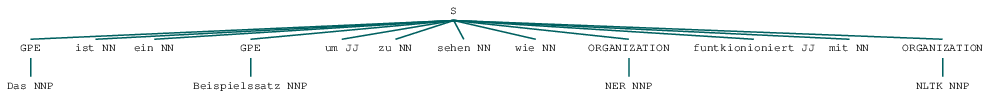

In [58]:
chunk = nltk.ne_chunk(tag_sent)
chunk

In [59]:
satz2 = 'Der Hopsel gieng nach Chicago um die Zibbe zu finden.'

In [60]:
tags2= nltk.pos_tag(word_tokenize(satz2))
tags2

[('Der', 'NNP'),
 ('Hopsel', 'NNP'),
 ('gieng', 'VBZ'),
 ('nach', 'FW'),
 ('Chicago', 'NNP'),
 ('um', 'NN'),
 ('die', 'NN'),
 ('Zibbe', 'NNP'),
 ('zu', 'NNP'),
 ('rammeln', 'NN'),
 ('.', '.')]

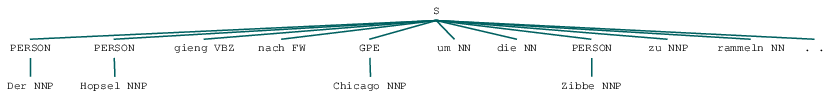

In [61]:
chunk2 = nltk.ne_chunk(tags2)
chunk2

In [64]:
tokens_sent = [word_tokenize(text.lower()) for text in articles['text']]

In [67]:
pos_sent = [nltk.pos_tag(words) for words in tokens_sent]
pos_sent

[[('image', 'NN'),
  ('copyright', 'NN'),
  ('epa', 'JJ'),
  ('image', 'NN'),
  ('caption', 'NN'),
  ('uber', 'NNP'),
  ('has', 'VBZ'),
  ('been', 'VBN'),
  ('criticised', 'VBN'),
  ('many', 'JJ'),
  ('times', 'NNS'),
  ('over', 'IN'),
  ('the', 'DT'),
  ('way', 'NN'),
  ('it', 'PRP'),
  ('runs', 'VBZ'),
  ('its', 'PRP$'),
  ('business', 'NN')],
 [('ride-sharing', 'JJ'),
  ('firm', 'NN'),
  ('uber', 'NN'),
  ('is', 'VBZ'),
  ('facing', 'VBG'),
  ('a', 'DT'),
  ('criminal', 'JJ'),
  ('investigation', 'NN'),
  ('by', 'IN'),
  ('the', 'DT'),
  ('us', 'PRP'),
  ('government', 'NN'),
  ('.', '.')],
 [('the', 'DT'),
  ('scrutiny', 'NN'),
  ('has', 'VBZ'),
  ('started', 'VBN'),
  ('because', 'IN'),
  ('the', 'DT'),
  ('firm', 'NN'),
  ('is', 'VBZ'),
  ('accused', 'VBN'),
  ('of', 'IN'),
  ('using', 'VBG'),
  ('``', '``'),
  ('secret', 'JJ'),
  ("''", "''"),
  ('software', 'NN'),
  ('that', 'WDT'),
  ('let', 'VBD'),
  ('it', 'PRP'),
  ('operate', 'VB'),
  ('in', 'IN'),
  ('regions', 'NNS'),
  

In [70]:
chunked_sentences = nltk.ne_chunk_sents(pos_sent, binary=True)
chunked_sentences

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x0000020D93C000C0>

In [97]:
for sent in chunked_sentences:
    for chunk in sent.subtrees():
            if hasattr(chunk, 'label') and chunk.label() =='NNE':
                print(chunk)

In [86]:
ner_categories = defaultdict(int)

In [93]:
for sent in chunked_sentences:
    for chunk in sent.subtrees():
        if hasattr(chunk,'label'):
            ner_categories[chunk.label()] +=1

In [94]:
labels = list(ner_categories.keys())

In [95]:
values= [ner_gategories.get(v) for v in labels]

([], [], [])

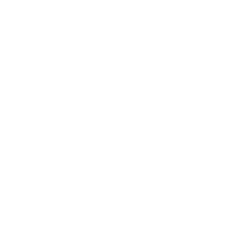

In [96]:
plt.pie(values,labels=labels, autopct='%1.1f%%', startangle=140)